# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

Let's generate our dataset and take a look on it.

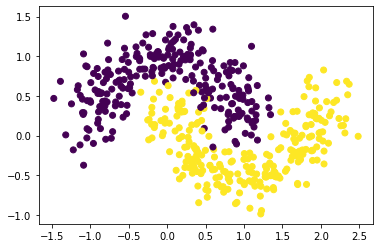

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, C = 6) # add some params
svm = SVC(kernel='linear',gamma='auto', probability=True)

lr.fit(moons_points,moons_labels)
svm.fit(moons_points,moons_labels)

SVC(gamma='auto', kernel='linear', probability=True)

In [5]:
print('Logistic Regression roc_auc_score: ', roc_auc_score(moons_labels,
                                      lr.predict_proba(moons_points)[:,1]))

print('Linear SVM roc_auc_score: ', roc_auc_score(moons_labels,
                                      svm.predict_proba(moons_points)[:,1]))

Logistic Regression roc_auc_score:  0.95208
Linear SVM roc_auc_score:  0.9523360000000001


In [6]:
from mlxtend.plotting import plot_decision_regions

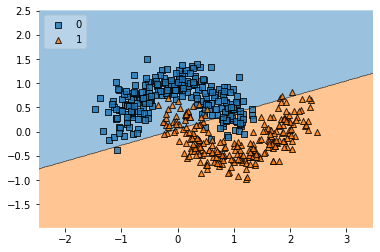

In [7]:
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm, legend=2)
plt.show()

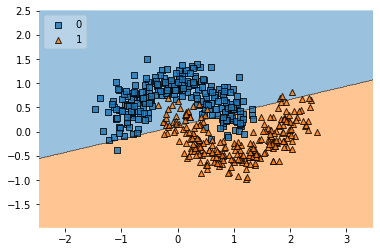

In [8]:
plot_decision_regions(X=moons_points, y=moons_labels, clf=lr, legend=2)
plt.show()

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [9]:
svm_poly = SVC(gamma='auto', kernel = 'poly', probability=True)
svm_rbf = SVC(gamma='auto', kernel = 'rbf', probability=True)
svm_sigmoid = SVC(gamma='auto', kernel = 'sigmoid', probability=True)

svm_poly.fit(moons_points,moons_labels)
svm_rbf.fit(moons_points,moons_labels)
svm_sigmoid.fit(moons_points,moons_labels)

SVC(gamma='auto', kernel='sigmoid', probability=True)

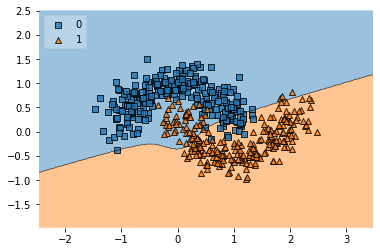

In [10]:
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_poly, legend=2)
plt.show()

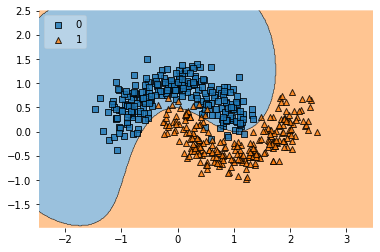

In [11]:
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_rbf, legend=2)
plt.show()

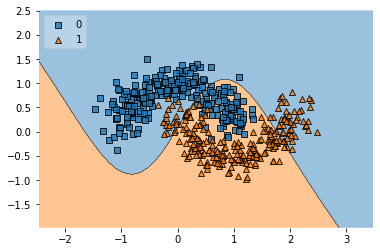

In [12]:
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_sigmoid, legend=2)
plt.show()

In [13]:
print('Poly SVM roc_auc_score: ', roc_auc_score(moons_labels,
                                      svm_poly.predict_proba(moons_points)[:,1]))

print('Rbf SVM roc_auc_score: ', roc_auc_score(moons_labels,
                                      svm_rbf.predict_proba(moons_points)[:,1]))

print('Sigmoid SVM roc_auc_score: ', roc_auc_score(moons_labels,
                                      svm_sigmoid.predict_proba(moons_points)[:,1]))

Poly SVM roc_auc_score:  0.9546399999999999
Rbf SVM roc_auc_score:  0.995184
Sigmoid SVM roc_auc_score:  0.8107040000000001


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
moons_points_poly = poly.fit_transform(moons_points)[:,1:]

In [31]:
lr_poly = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, C = 6) 

lr_poly.fit(moons_points_poly,moons_labels)

LogisticRegression(C=6, max_iter=500, solver='saga', tol=0.001)

In [32]:
print('Poly lr roc_auc_score: ', roc_auc_score(moons_labels,
                                      lr_poly.predict_proba(moons_points_poly)[:,1]))

Poly lr roc_auc_score:  0.997408


Зафиксируем полиномиальыне признаки средними значениями, и рассмотрим их окрестность

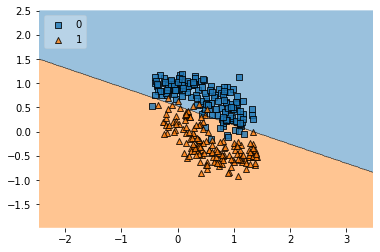

In [56]:
width=1.5

val = {i:np.mean(moons_points_poly[:,i]) for i in [2,3,4,5,6,7,8]} 
ran = {i:width for i in [2,3,4,5,6,7,8]}  
  
plot_decision_regions(X=moons_points_poly, y=moons_labels, clf=lr_poly, legend=2,
                     filler_feature_values=val,
                     filler_feature_ranges=ran)
plt.show()

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

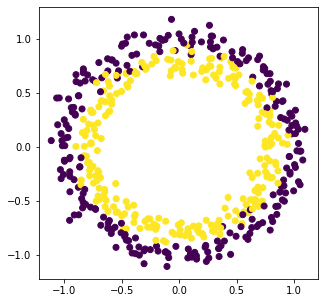

In [57]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

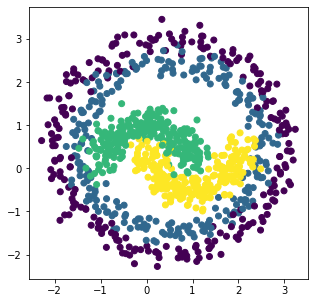

In [58]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

### 1. Regression is my profession

In [87]:
poly = PolynomialFeatures(3)
points_poly = poly.fit_transform(points)

In [88]:
lr_poly2 = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, C = 6) 
lr_poly2.fit(points_poly,labels)

LogisticRegression(C=6, max_iter=500, solver='saga', tol=0.001)

In [89]:
print('Poly lr roc_auc_score: ', roc_auc_score(labels,
                                      lr_poly2.predict_proba(points_poly),
                                              multi_class = 'ovo'))

Poly lr roc_auc_score:  0.9890639999999999


### 2. SVM

In [132]:
svm_rbf2_poly = SVC(gamma=5, kernel = 'rbf', probability=True)

svm_rbf2_poly.fit(points_poly,labels)


print('Poly svm-rbf roc_auc_score: ', roc_auc_score(labels,
                                      svm_rbf2_poly.predict_proba(points_poly),
                                              multi_class = 'ovo'))

Poly svm-rbf roc_auc_score:  0.999736


Уберем полиномы

In [133]:
svm_rbf2 = SVC(gamma=5, kernel = 'rbf', probability=True)
svm_rbf2.fit(points,labels)

print('svm-rbf roc_auc_score: ', roc_auc_score(labels,
                                      svm_rbf2.predict_proba(points),
                                              multi_class = 'ovo'))

svm-rbf roc_auc_score:  0.9955560000000001


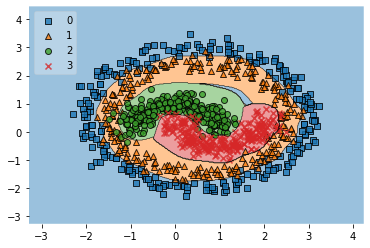

In [134]:
plot_decision_regions(X=points, y=labels, clf=svm_rbf2, legend=2)
plt.show()

### 3.Бустим пока бьется сердце

In [136]:
from catboost import CatBoostClassifier

In [153]:
cat = CatBoostClassifier(iterations=1000, verbose=100,early_stopping_rounds=10)

cat.fit(points, labels)


Learning rate set to 0.079127
0:	learn: 1.3102862	total: 3.07ms	remaining: 3.07s
100:	learn: 0.2455447	total: 199ms	remaining: 1.77s
200:	learn: 0.1534161	total: 361ms	remaining: 1.43s
300:	learn: 0.1225496	total: 520ms	remaining: 1.21s
400:	learn: 0.1041073	total: 678ms	remaining: 1.01s
500:	learn: 0.0907118	total: 837ms	remaining: 833ms
600:	learn: 0.0808815	total: 993ms	remaining: 659ms
700:	learn: 0.0728508	total: 1.15s	remaining: 491ms
800:	learn: 0.0658414	total: 1.31s	remaining: 325ms
900:	learn: 0.0600446	total: 1.48s	remaining: 162ms
999:	learn: 0.0550696	total: 1.63s	remaining: 0us


In [154]:
print('svm-rbf roc_auc_score: ', roc_auc_score(labels,
                                      cat.predict_proba(points),
                                              multi_class = 'ovo'))

svm-rbf roc_auc_score:  0.9999786666666667


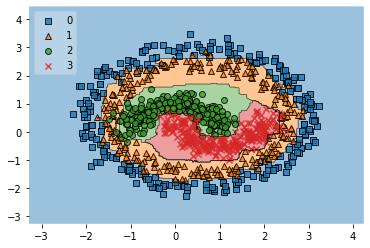

In [152]:
plot_decision_regions(X=points, y=labels, clf=cat, legend=2)
plt.show()

Если переобучаться, то только так!

### 4. Итог

SVM с ядром rbf и полиномиальными фичами показал достаточно неплохой результат (так как на картинки явно видны окружности)

Но есть такие алгоритмы, который српавятся лучше, например, бустинг, который способен просто запомнить обучающую выборку. Поэтому лучше проверяться на отноженной валидационной и тестовой выборке.